In [5]:
import numpy as np
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt 
import sklearn 
from sklearn.cluster import AgglomerativeClustering


# Euclidean distance

In [6]:
# initializing points in
# numpy arrays
p_1 = np.array([1, 2, 3])
p_2 = np.array([1, 1, 1])

# subtraction vectors
temp = p_1 - p_2

# dot product to find the sum of the squares 
# reminder the dot product multiplies every element of an array for the corrsponding element of another array and sums the products

sum_sq = np.dot(temp,temp)


dist = np.sqrt(sum_sq)


print(dist)

2.23606797749979


We can also define a function that does that for us really quickly

In [7]:
def e_dist(vector1, vector2):
    diff = vector1 - vector2
    return np.sqrt(np.dot(diff,diff))

e_dist(p_1, p_1)


0.0

# Cluster types

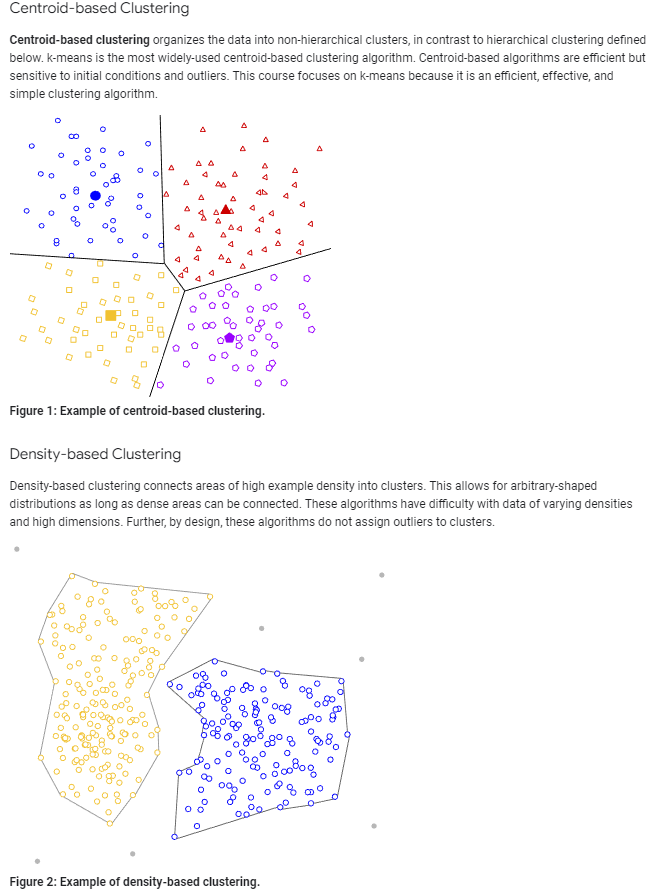

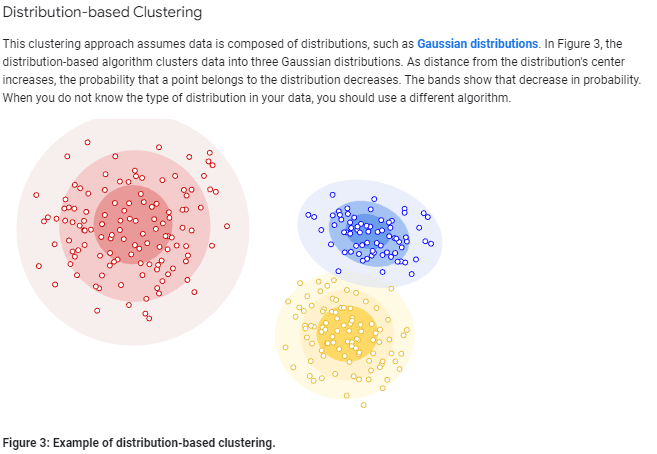

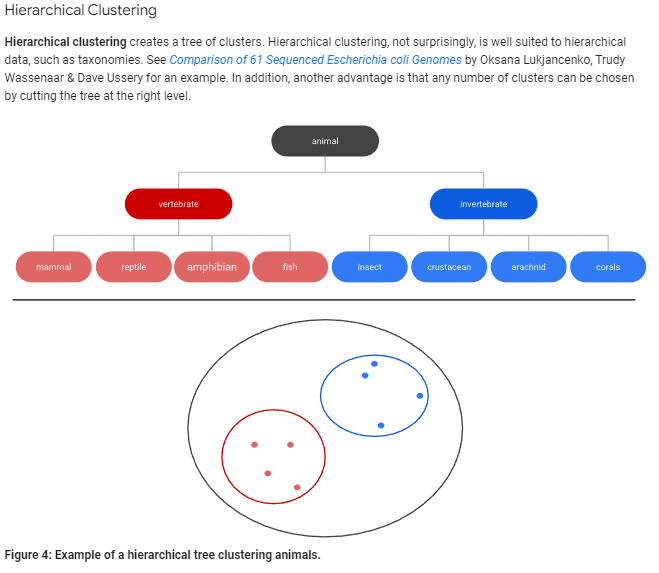

# Agglomerative CLustering

https://www.youtube.com/watch?v=7xHsRkOdVwo


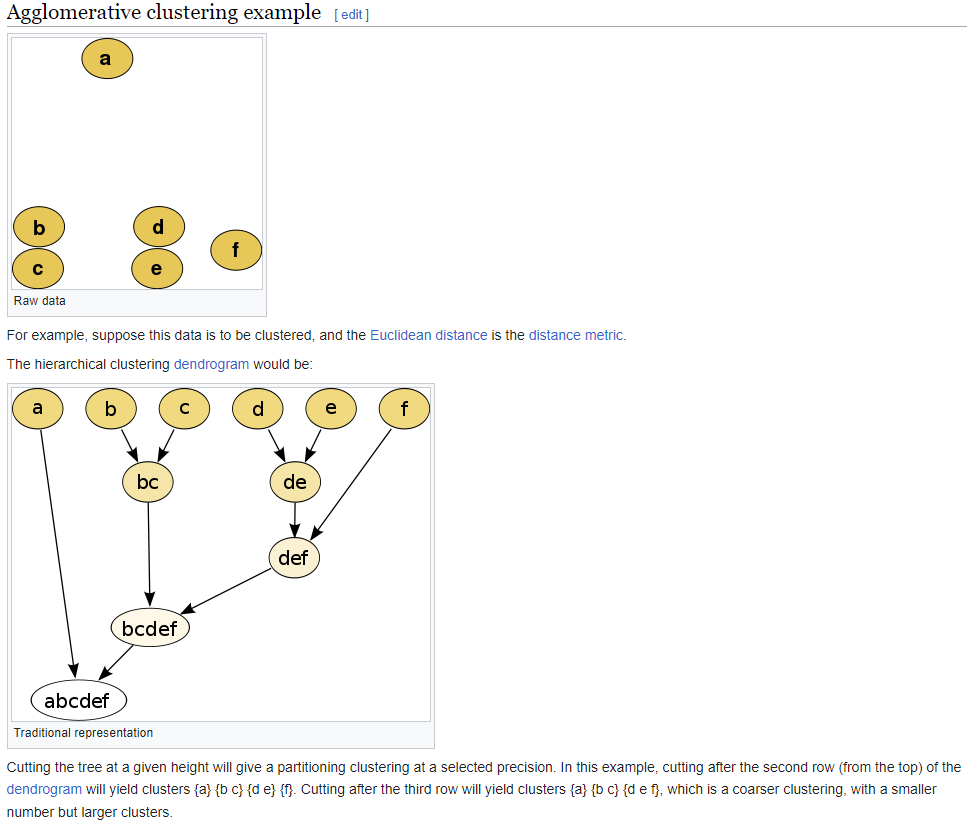

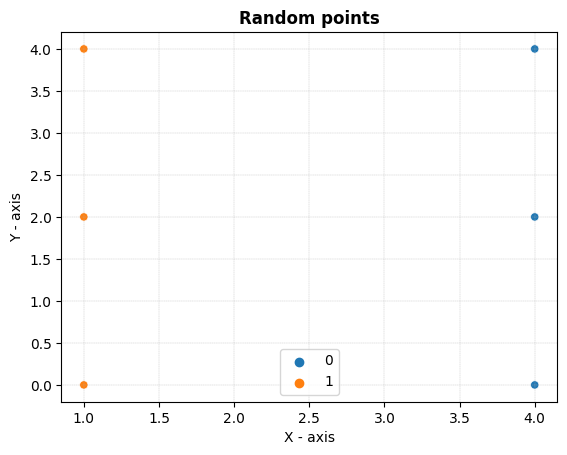

In [16]:
X = np.array([[1, 2], [1, 4], [1, 0],
              [4, 2], [4, 4], [4, 0]])

# the syntax give that aou array is a matrix 2x6 means that we are taking first all the x values for the 0 column and than all the x values for the 1 column


# we us an in-build function to cluster the values
clustering = AgglomerativeClustering().fit(X)

# This give the values of the labels of our points
clustering.labels_

# We can tha nuse a scatter plot with that "hue " to see the results
sns.scatterplot(x = X[:,0], y = X[:,1], hue = clustering.labels_)
plt.title('Random points', fontsize = 12, fontweight = 'bold')
plt.xlabel('X - axis')
plt.ylabel('Y - axis')
plt.grid(linestyle = '--', linewidth = 0.25)

# plt.scatter(x = X[:,0], y = X[:,1], c = clustering.labels_, cmap = 'coolwarm')


In [9]:
# We can check the label value for each of our points
clustering.labels_

array([1, 1, 1, 0, 0, 0], dtype=int64)

In [10]:
# We can check the number of cluster 
clustering.n_clusters


2

# K-Means Clustering

https://developers.google.com/machine-learning/clustering/algorithm/advantages-disadvantages

$f(\theta) = \sum_{i=1}^N \sum_{i=1}^K A_{nk}|| \theta_k - x_n||^2$ 

$\theta_k = \text{centroid of the }k^{th} \text{ cluster}$

$A_{nk} = 1\text{ when the } n^{th} \text{ point is assigned to the } n^{th} \text {cluster}$

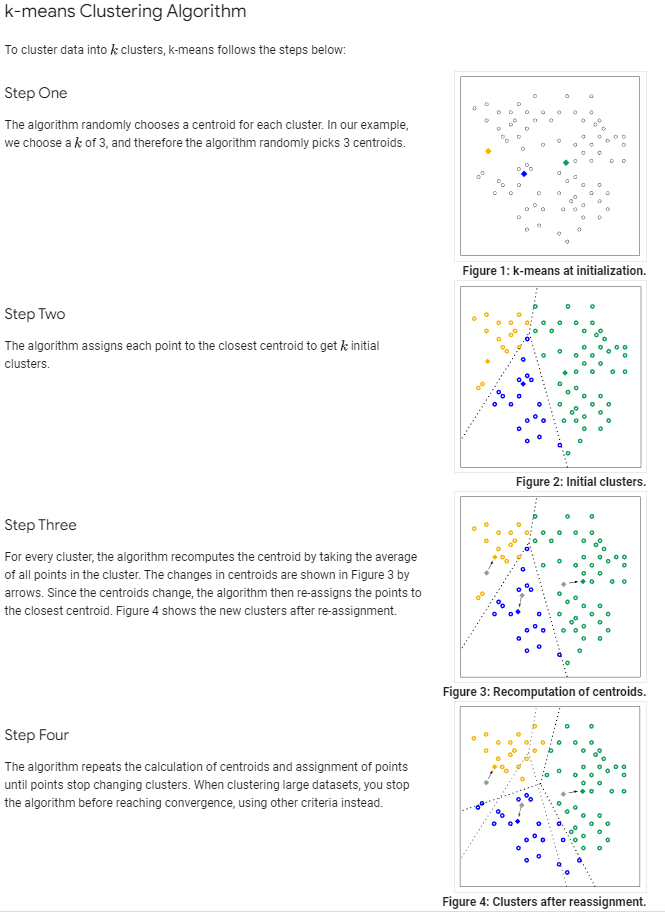

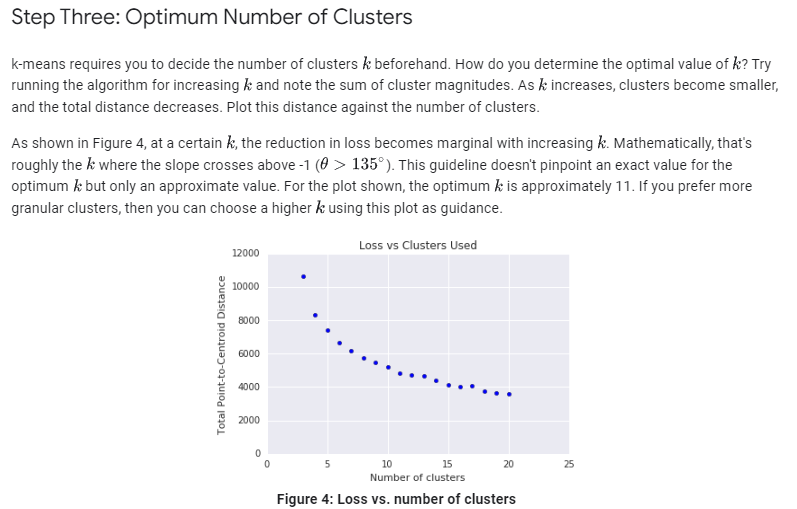

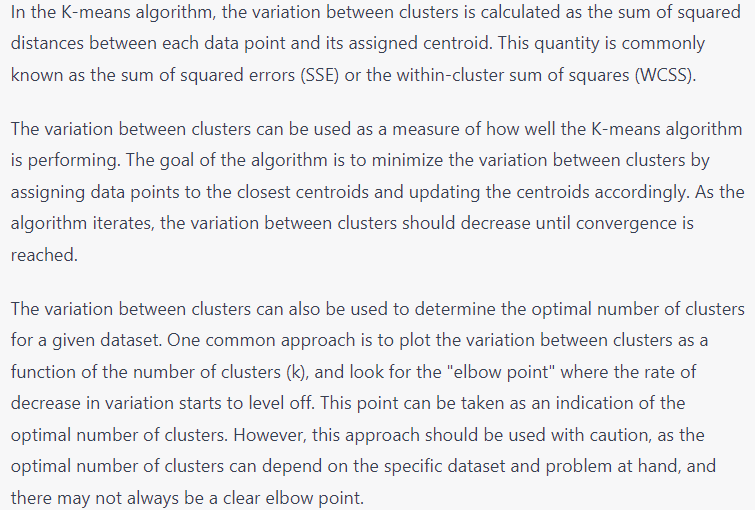




In [26]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

The sklearn site with the description of the function:
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans

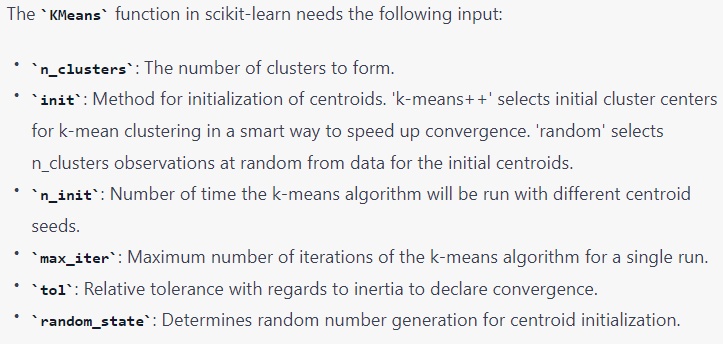

In [21]:
# sSo we are appling kmenas to cluster our data at the moment, lets see how it will look like
kmeans = KMeans(n_clusters=2, random_state= 0, n_init= 'auto').fit(X)

In [22]:
# As for the Clusterin.labels we can show the labels, as we can see they differ from our previus labesl
kmeans.labels_

array([1, 0, 1, 0, 0, 1])

In [23]:
# WE GAVE HIM TWO POINTS AND HE GIVES US A PREDICTION FOR THE LABELS OF THE TWO POINTS
kmeans.predict([[0, 0], [12,2]])

array([1, 0])

In [24]:
# It gives us the centroid of the clusters, can be useful , let's say we actually want to calculate the centroid for example
kmeans.cluster_centers_

array([[3.        , 3.33333333],
       [2.        , 0.66666667]])

Let's see the result of K-means compared to the agglomerative clusteringfrom before


We have a very different result, it is not very intuitive what we are getting to be honest i would not like this result


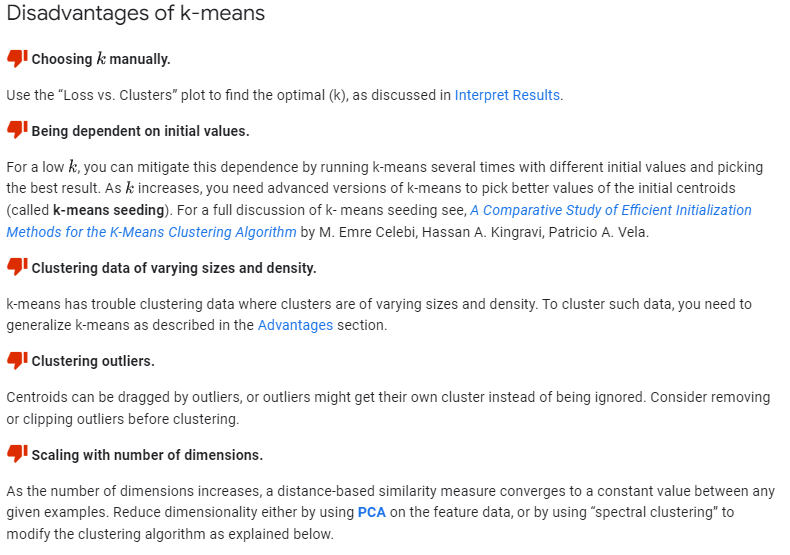

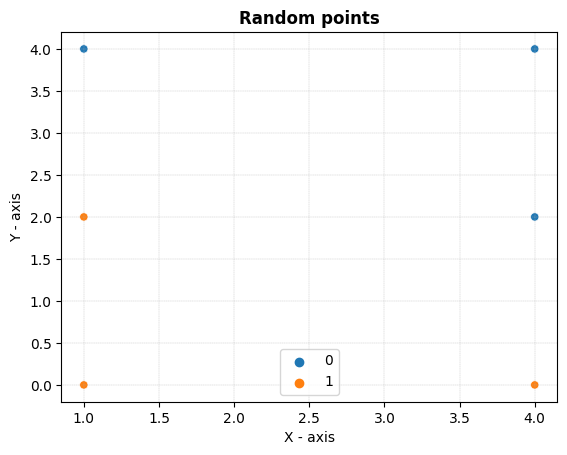

In [33]:
# We can tha nuse a scatter plot with that "hue " to see the results
sns.scatterplot(x = X[:,0], y = X[:,1], hue = kmeans.labels_)
plt.title('Random points', fontsize = 12, fontweight = 'bold')
plt.xlabel('X - axis')
plt.ylabel('Y - axis')
plt.grid(linestyle = '--', linewidth = 0.25)

# this is mainly because we are using the centroids and we are not actually comparing the point the other points but rather the point to their average (the centroids)
# On the other hand this algoritm is very quick

In [37]:
import random 

[[ 0.79660991  1.54225509]
 [ 1.50660668  0.96190164]
 [-1.17641441  0.17328719]
 ...
 [-1.58637564  0.8806877 ]
 [-0.26824257  0.88121934]
 [-1.81714625  1.87437317]]


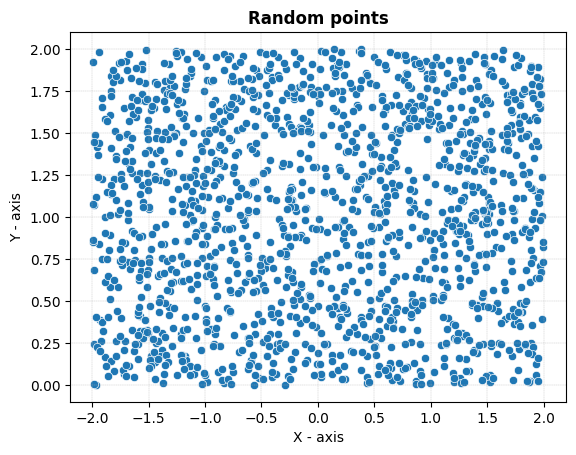

In [66]:

num_points = 1500

x_p = np.random.uniform(low = -2, high= 2, size= num_points)
y_p = np.random.uniform(low = 0, high= 2, size= num_points)

Y = np.column_stack((x_p, y_p))
sns.scatterplot(x = x_p,y =  y_p)
plt.title('Random points', fontsize = 12, fontweight = 'bold')
plt.xlabel('X - axis')
plt.ylabel('Y - axis')
plt.grid(linestyle = '--', linewidth = 0.25)

print(Y)

In [74]:
kmeans_y = KMeans(n_clusters=4, random_state= 0, n_init= 'auto').fit(Y)

In [72]:
kmeans_y.labels_

array([2, 3, 1, ..., 1, 0, 1])

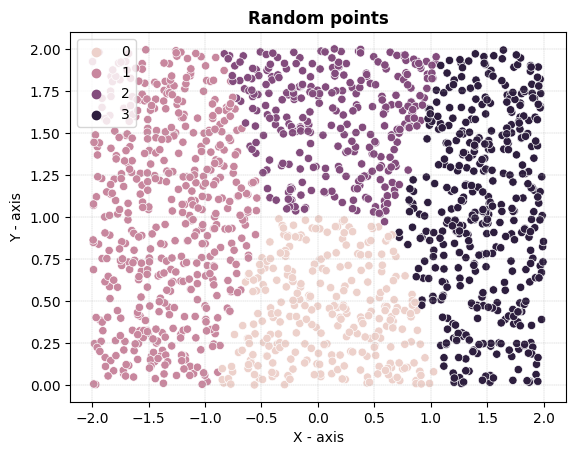

In [75]:
sns.scatterplot(x = x_p,y =  y_p, hue= kmeans_y.labels_)
plt.title('Random points', fontsize = 12, fontweight = 'bold')
plt.xlabel('X - axis')
plt.ylabel('Y - axis')
plt.grid(linestyle = '--', linewidth = 0.25)

# TIPS EXAMPLES

In [218]:
# import pandas as pd

df = pl.read_csv(r'https://media.githubusercontent.com/media/jakub-braja/Podstawy-uczenia-maszynowego/main/DataSets/tips.csv',  separator= ',')

df.head(10)

index_of_row,total_bill,tip,sex,smoker,day,time,size
i64,f64,f64,str,str,str,str,i64
0,16.99,1.01,"""Female""","""No""","""Sun""","""Dinner""",2
1,10.34,1.66,"""Male""","""No""","""Sun""","""Dinner""",3
2,21.01,3.5,"""Male""","""No""","""Sun""","""Dinner""",3
3,23.68,3.31,"""Male""","""No""","""Sun""","""Dinner""",2
4,24.59,3.61,"""Female""","""No""","""Sun""","""Dinner""",4
5,25.29,4.71,"""Male""","""No""","""Sun""","""Dinner""",4
6,8.77,2.0,"""Male""","""No""","""Sun""","""Dinner""",2
7,26.88,3.12,"""Male""","""No""","""Sun""","""Dinner""",4
8,15.04,1.96,"""Male""","""No""","""Sun""","""Dinner""",2


<AxesSubplot: xlabel='total_bill', ylabel='tip'>

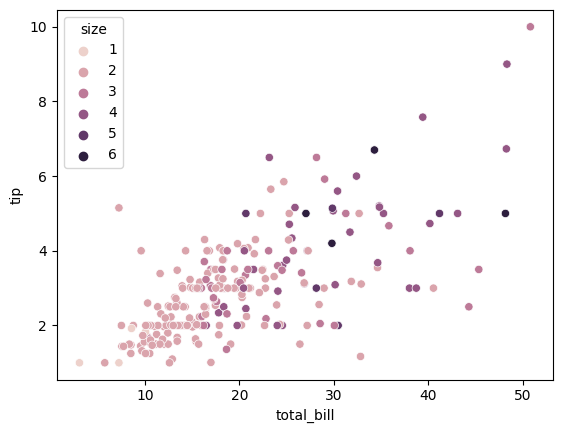

In [173]:
sns.scatterplot(x= df['total_bill'], y= df['tip'], hue= df['size'])

We converted our dataframe to a numpy array as it is faster and easyly managable

In [174]:
Z = df[['tip', 'total_bill']].to_numpy()

# Agglomerative Clustering & Kmeans Examples

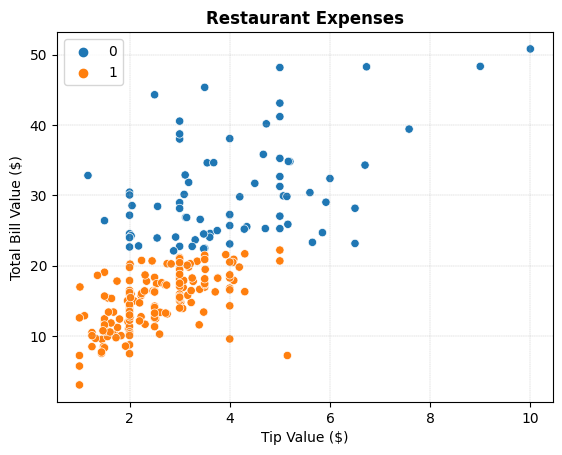

In [219]:
# Agglomerative clustering perfomed very well in the case of the 46 points example before but now it seems to suck quite a lot 

clustering = AgglomerativeClustering().fit(Z)
sns.scatterplot(x=df['tip'], y=df['total_bill'], hue=clustering.labels_)
plt.title('Restaurant Expenses', fontsize = 12, fontweight = 'bold')
plt.xlabel('Tip Value ($)')
plt.ylabel('Total Bill Value ($)')
plt.grid(linestyle = '--', linewidth = 0.25)

In [220]:
clustering.labels_
print(f"Total number = {len(clustering.labels_)}\n1 = {sum(clustering.labels_)}\n0 = {len(clustering.labels_) - sum(clustering.labels_)}")


Total number = 244
1 = 168
0 = 76


https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html

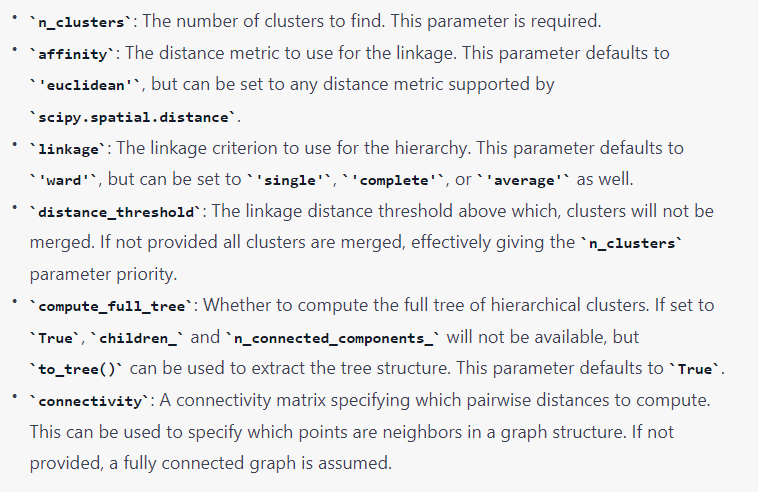

In [223]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['total_bill', 'size']] = scaler.fit_transform(df['total_bill'])


ValueError: Expected 2D array, got 1D array instead:
array=[16.99 10.34 21.01 23.68 24.59 25.29  8.77 26.88 15.04 14.78 10.27 35.26
 15.42 18.43 14.83 21.58 10.33 16.29 16.97 20.65 17.92 20.29 15.77 39.42
 19.82 17.81 13.37 12.69 21.7  19.65  9.55 18.35 15.06 20.69 17.78 24.06
 16.31 16.93 18.69 31.27 16.04 17.46 13.94  9.68 30.4  18.29 22.23 32.4
 28.55 18.04 12.54 10.29 34.81  9.94 25.56 19.49 38.01 26.41 11.24 48.27
 20.29 13.81 11.02 18.29 17.59 20.08 16.45  3.07 20.23 15.01 12.02 17.07
 26.86 25.28 14.73 10.51 17.92 27.2  22.76 17.29 19.44 16.66 10.07 32.68
 15.98 34.83 13.03 18.28 24.71 21.16 28.97 22.49  5.75 16.32 22.75 40.17
 27.28 12.03 21.01 12.46 11.35 15.38 44.3  22.42 20.92 15.36 20.49 25.21
 18.24 14.31 14.    7.25 38.07 23.95 25.71 17.31 29.93 10.65 12.43 24.08
 11.69 13.42 14.26 15.95 12.48 29.8   8.52 14.52 11.38 22.82 19.08 20.27
 11.17 12.26 18.26  8.51 10.33 14.15 16.   13.16 17.47 34.3  41.19 27.05
 16.43  8.35 18.64 11.87  9.78  7.51 14.07 13.13 17.26 24.55 19.77 29.85
 48.17 25.   13.39 16.49 21.5  12.66 16.21 13.81 17.51 24.52 20.76 31.71
 10.59 10.63 50.81 15.81  7.25 31.85 16.82 32.9  17.89 14.48  9.6  34.63
 34.65 23.33 45.35 23.17 40.55 20.69 20.9  30.46 18.15 23.1  15.69 19.81
 28.44 15.48 16.58  7.56 10.34 43.11 13.   13.51 18.71 12.74 13.   16.4
 20.53 16.47 26.59 38.73 24.27 12.76 30.06 25.89 48.33 13.27 28.17 12.9
 28.15 11.59  7.74 30.14 12.16 13.42  8.58 15.98 13.42 16.27 10.09 20.45
 13.28 22.12 24.01 15.69 11.61 10.77 15.53 10.07 12.6  32.83 35.83 29.03
 27.18 22.67 17.82 18.78].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

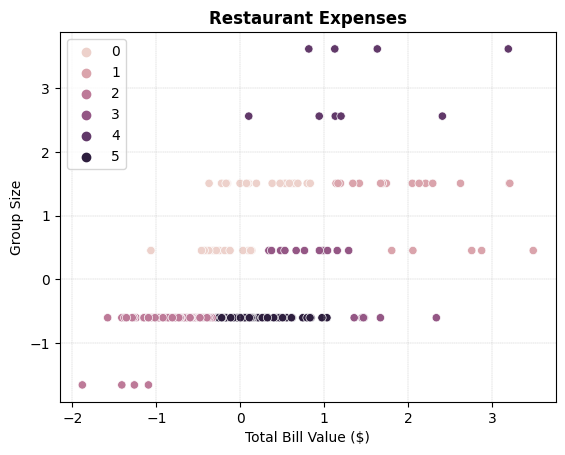

In [217]:
Q = df[['total_bill', 'size']].to_numpy()

clustering_Q = AgglomerativeClustering(n_clusters=6).fit(Q)


sns.scatterplot(x=df['total_bill'], y=df['size'], hue=clustering_Q.labels_)
plt.title('Restaurant Expenses', fontsize = 12, fontweight = 'bold')
plt.xlabel('Total Bill Value ($)')
plt.ylabel('Group Size')
plt.grid(linestyle = '--', linewidth = 0.25)

In [192]:
from sklearn.cluster import SpectralClustering

### The parameters for the Spectral Clustering

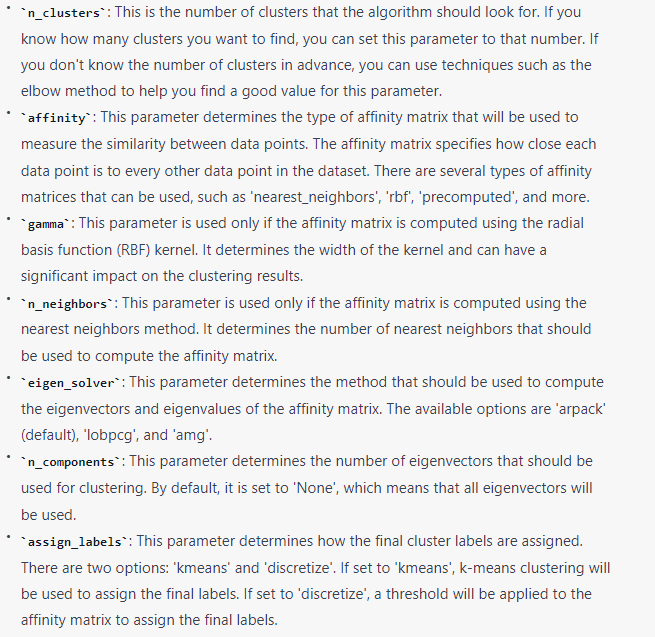

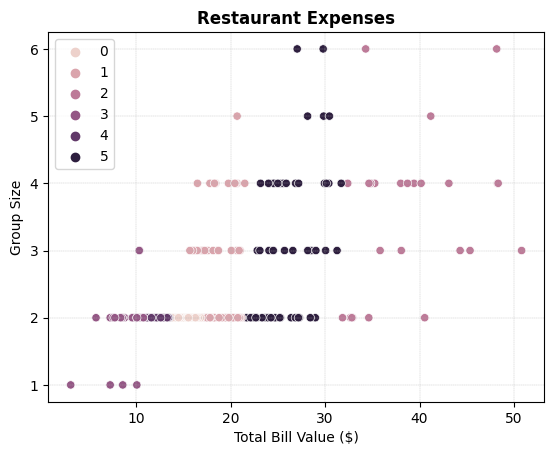

In [205]:
R = df[['total_bill', 'size']].to_numpy()

clustering_R = SpectralClustering(n_clusters=6, affinity='nearest_neighbors').fit(R)


sns.scatterplot(x=df['total_bill'], y=df['size'], hue=clustering_R.labels_)
plt.title('Restaurant Expenses', fontsize = 12, fontweight = 'bold')
plt.xlabel('Total Bill Value ($)')
plt.ylabel('Group Size')
plt.grid(linestyle = '--', linewidth = 0.25)

In [195]:
from sklearn.cluster import DBSCAN

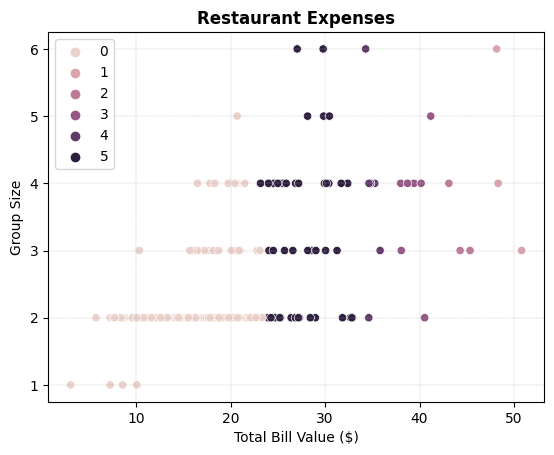

In [208]:
S = df[['total_bill', 'size']].to_numpy()

clustering_S = SpectralClustering(6).fit(S)


sns.scatterplot(x=df['total_bill'], y=df['size'], hue=clustering_S.labels_)
plt.title('Restaurant Expenses', fontsize = 12, fontweight = 'bold')
plt.xlabel('Total Bill Value ($)')
plt.ylabel('Group Size')
plt.grid(linestyle = '--', linewidth = 0.25)

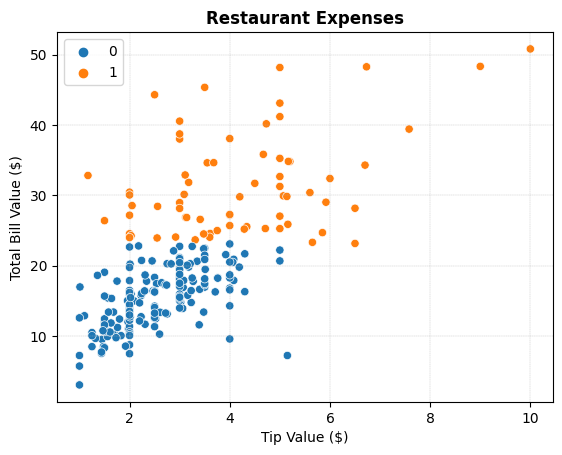

In [119]:
# This time KMEANS performed as well as agglomerative clustering

kmeans_df = KMeans(n_clusters=2, n_init='auto', random_state=0).fit(Z)
sns.scatterplot(x=df['tip'], y=df['total_bill'], hue= kmeans_df.labels_)
plt.title('Restaurant Expenses', fontsize = 12, fontweight = 'bold')
plt.xlabel('Tip Value ($)')
plt.ylabel('Total Bill Value ($)')
plt.grid(linestyle = '--', linewidth = 0.25)

In [149]:
kmeans_df.labels_
print(f"Total number = {len(kmeans_df.labels_)}\n1 = {sum(kmeans_df.labels_)}\n0 = {len(kmeans_df.labels_) - sum(kmeans_df.labels_)}")

Total number = 244
1 = 68
0 = 176


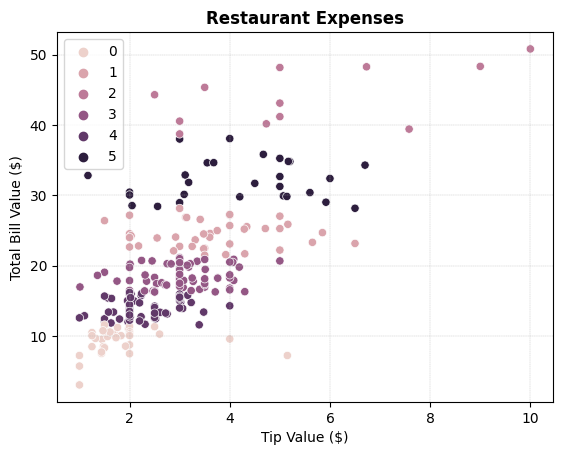

In [151]:
# Using KMeans it is very easy to adjust the number of cluster to our scope

kmeans_df_6 = KMeans(n_clusters=6, n_init='auto', random_state=0).fit(Z)
sns.scatterplot(x=df['tip'], y=df['total_bill'], hue= kmeans_df.labels_)
plt.title('Restaurant Expenses', fontsize = 12, fontweight = 'bold')
plt.xlabel('Tip Value ($)')
plt.ylabel('Total Bill Value ($)')
plt.grid(linestyle = '--', linewidth = 0.25)

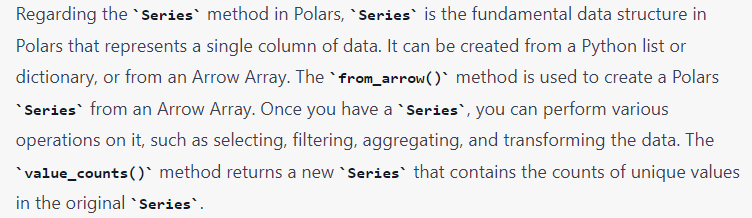

In [158]:
# let's say i want to count how many point do i have in each label

labels = pl.Series(kmeans_df_6.labels_)  # Convert kmeans_df_6.labels_ to a Polars Series
counts = labels.value_counts()  # Get the counts for each label
print(counts)

shape: (6, 2)
┌─────┬────────┐
│     ┆ counts │
│ --- ┆ ---    │
│ i32 ┆ u32    │
╞═════╪════════╡
│ 2   ┆ 12     │
│ 3   ┆ 65     │
│ 1   ┆ 40     │
│ 4   ┆ 62     │
│ 0   ┆ 37     │
│ 5   ┆ 28     │
└─────┴────────┘


# TITANIC Dataset

In [242]:
titanic = pl.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')
titanic.head(50)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
i64,i64,i64,str,str,f64,i64,i64,str,f64,str,str
1,0,3,"""Braund, Mr. Ow...","""male""",22.0,1,0,"""A/5 21171""",7.25,null,"""S"""
2,1,1,"""Cumings, Mrs. ...","""female""",38.0,1,0,"""PC 17599""",71.2833,"""C85""","""C"""
3,1,3,"""Heikkinen, Mis...","""female""",26.0,0,0,"""STON/O2. 31012...",7.925,null,"""S"""
4,1,1,"""Futrelle, Mrs....","""female""",35.0,1,0,"""113803""",53.1,"""C123""","""S"""
5,0,3,"""Allen, Mr. Wil...","""male""",35.0,0,0,"""373450""",8.05,null,"""S"""
6,0,3,"""Moran, Mr. Jam...","""male""",null,0,0,"""330877""",8.4583,null,"""Q"""
7,0,1,"""McCarthy, Mr. ...","""male""",54.0,0,0,"""17463""",51.8625,"""E46""","""S"""
8,0,3,"""Palsson, Maste...","""male""",2.0,3,1,"""349909""",21.075,null,"""S"""
9,1,3,"""Johnson, Mrs. ...","""female""",27.0,0,2,"""347742""",11.1333,null,"""S"""


We had to fill the null values in our dataset prior to proceding with the computation 

In [264]:
A = titanic[['Fare','Age']]
A = A.fill_null(0)

A = A.to_numpy()
y = titanic[['Survived']].to_numpy()

np.shape(y)

(891, 1)

We now perform the clustering 

In [243]:
clf = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(A)

Here we plot the actual data that we have from our Dataset

<AxesSubplot: xlabel='Age', ylabel='Fare'>

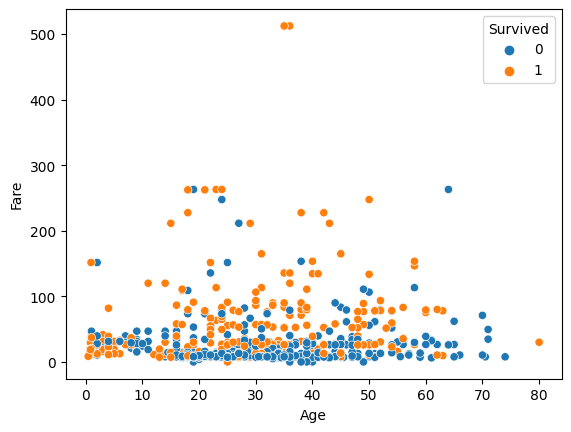

In [244]:
sns.scatterplot(x=titanic['Age'], y=titanic['Fare'], hue=titanic['Survived'])

Here we pot the clustered data into two labels, Survided 

<AxesSubplot: xlabel='Age', ylabel='Fare'>

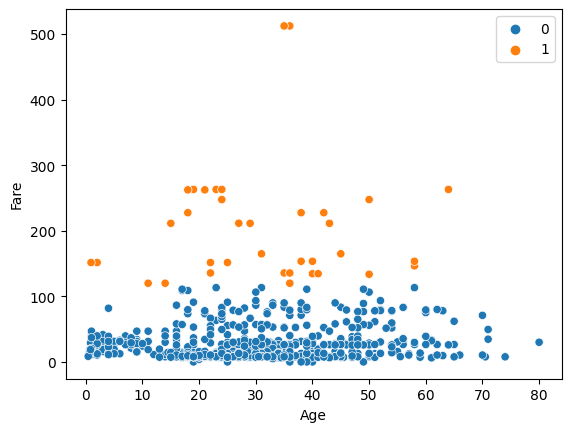

In [247]:
sns.scatterplot(x=titanic['Age'], y=titanic['Fare'], hue=clf.labels_)

In [265]:
clf.predict(A)
np.shape(clf.predict(A))

(891,)

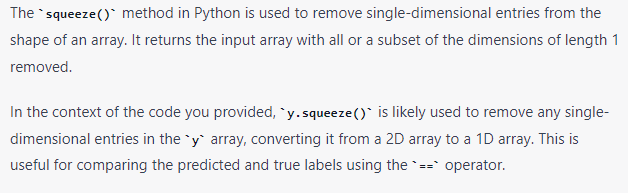

In [254]:
#ile się udało trafić klas, za pomocą indeksowania logicznego
correct = (clf.predict(A) == y.squeeze()).sum()  # we have to squeez as the shape of y is (891,1)

# We are printing the ratio of teh correct answers to the toa lnumber of passangers. The ratio is close to 60% which is close to 50% meaning randomness in a 2 possible state indipendendt events

print(correct/len(A))

0.6408529741863075


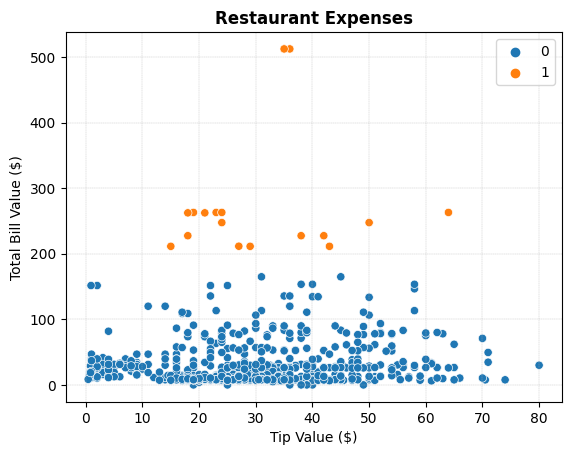

In [257]:
clustering_A = AgglomerativeClustering().fit(A)

sns.scatterplot(x=titanic['Age'], y=titanic['Fare'], hue= clustering_A.labels_)
plt.title('Restaurant Expenses', fontsize = 12, fontweight = 'bold')
plt.xlabel('Tip Value ($)')
plt.ylabel('Total Bill Value ($)')
plt.grid(linestyle = '--', linewidth = 0.25)

In [260]:
correct = (clustering_A.labels_ == y.squeeze()).sum()

# Calculate the accuracy ratio and print it
accuracy_ratio = correct / len(A)
print(accuracy_ratio)

0.6251402918069585
